In [ ]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns # untuk visualisasi data
import matplotlib.pyplot as plt # untuk visualisasi data
import missingno as msno # untuk visualisasi data
# untuk persiapan data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
#Modelling
from sklearn.linear_model import Ridge as rid
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score



In [ ]:
data=pd.read_excel('/content/Juni 2019.xlsx')

In [ ]:
np.random.seed(2022)

#Data Understanding

In [ ]:
data

,No.,Sector,Sub Sector Code,Sub Sector,Code,Stock Name,Sharia,"Market Cap., b.IDR","Regular Volume, th.shares","Regular Value, m.IDR","Regular Freq, x",Regular Days,"Total Volume, th.shares","Total Value, m.IDR","Total Freq, x",Total Days
0,1,AGRICULTURE,11,Crops,BISI,Bisi International Tbk.,S,4425.000000,14320.6,21188.8290,3847,15,26570.108,39234.826980,3860,15
1,2,AGRICULTURE,12,Plantation,ANDI,Andira Agro Tbk.,-,3758.700000,1975.7,3773.9010,780,15,2711.000,4773.909000,781,15
2,3,AGRICULTURE,12,Plantation,AALI,Astra Agro Lestari Tbk.,S,20016.758663,8593.9,88918.2750,9706,15,9460.842,97873.369325,9721,15
3,4,AGRICULTURE,12,Plantation,ANJT,Austindo Nusantara Jaya Tbk.,S,3052.299250,778.4,701.6310,134,12,778.400,701.631000,134,12
4,5,AGRICULTURE,12,Plantation,UNSP,Bakrie Sumatera Plantations Tbk.,-,222.514449,27257.1,2389.4448,3506,15,27257.400,2389.471200,3508,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,TRADE AND SERVICES,99,Other not elsewhere classified,SIMA,Siwani Makmur Tbk.,-,41.160858,513369.6,51933.2526,35317,15,513701.713,51967.713250,35320,15
634,635,TRADE AND SERVICES,99,Other not elsewhere classified,ITMA,Sumber Energi Andalan Tbk.,S,523.600000,88.4,67.9835,107,14,88.400,67.983500,107,14
635,636,TRADE AND SERVICES,99,Other not elsewhere classified,SFAN,Surya Fajar Capital Tbk,-,637.500000,33290.1,20139.1928,5338,8,33290.100,20139.192800,5338,8
636,637,TRADE AND SERVICES,99,Other not elsewhere classified,INDX,Tanah Laut Tbk.,-,30.653951,2245.3,157.3933,837,15,2245.300,157.393300,837,15


In [ ]:
data['Code']

0      BISI
1      ANDI
2      AALI
3      ANJT
4      UNSP
       ... 
633    SIMA
634    ITMA
635    SFAN
636    INDX
637    YELO
Name: Code, Length: 638, dtype: object

In [ ]:
data.shape

(638, 16)

In [ ]:
data.dtypes

No.                            int64
Sector                        object
Sub Sector Code                int64
Sub Sector                    object
Code                          object
Stock Name                    object
Sharia                        object
Market Cap., b.IDR           float64
Regular Volume, th.shares    float64
Regular Value, m.IDR         float64
Regular Freq, x                int64
Regular Days                   int64
Total Volume, th.shares      float64
Total Value, m.IDR           float64
Total Freq, x                  int64
Total Days                     int64
dtype: object

#Missing Value


In [ ]:
data.isna().sum()

No.                          0
Sector                       0
Sub Sector Code              0
Sub Sector                   0
Code                         0
Stock Name                   0
Sharia                       0
Market Cap., b.IDR           0
Regular Volume, th.shares    0
Regular Value, m.IDR         0
Regular Freq, x              0
Regular Days                 0
Total Volume, th.shares      0
Total Value, m.IDR           0
Total Freq, x                0
Total Days                   0
dtype: int64

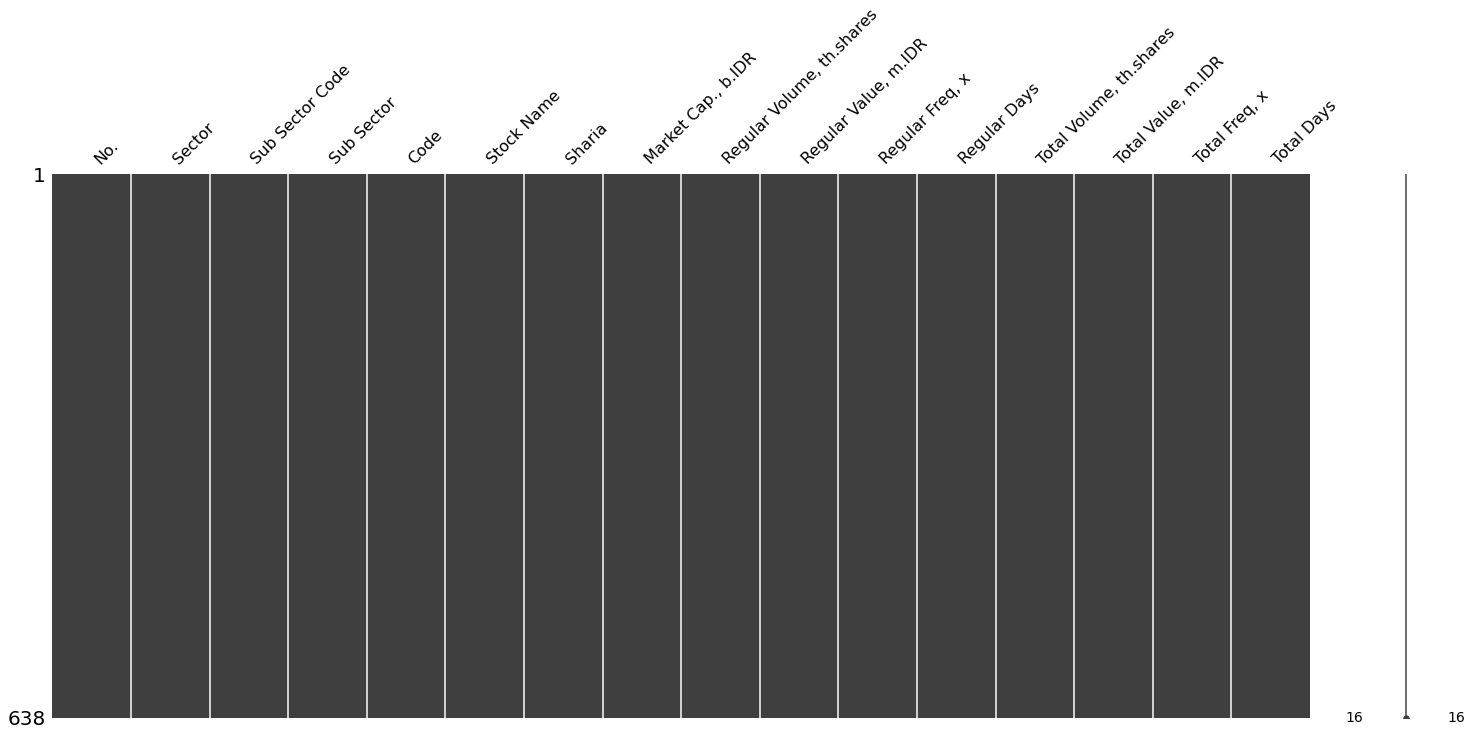

In [ ]:
msno.matrix(data)
plt.show()

#Eksplorasi dan Visualisasi Data

In [ ]:
data.duplicated().value_counts()

False    638
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

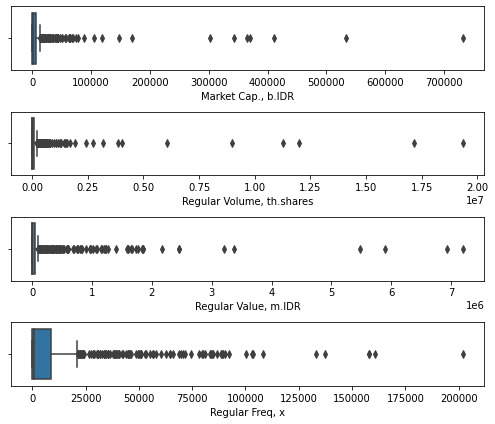

In [ ]:
fig, ax = plt.subplots(4, figsize = (7, 6))
plot_market = sns.boxplot(data['Market Cap., b.IDR'], ax = ax[0])
plot_rvolume = sns.boxplot(data['Regular Volume, th.shares'], ax = ax[1])
plot_rvalue = sns.boxplot(data['Regular Value, m.IDR'], ax = ax[2])
plot_rfreq = sns.boxplot(data['Regular Freq, x'], ax = ax[3])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

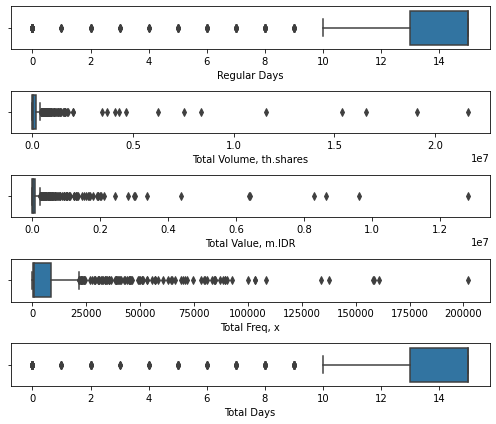

In [ ]:
fig, ax = plt.subplots(5, figsize = (7, 6))
plot_rd = sns.boxplot(data['Regular Days'], ax = ax[0])
plot_tvolume = sns.boxplot(data['Total Volume, th.shares'], ax = ax[1])
plot_tvalue = sns.boxplot(data['Total Value, m.IDR'], ax = ax[2])
plot_tfreq = sns.boxplot(data['Total Freq, x'], ax = ax[3])
plot_tdays = sns.boxplot(data['Total Days'], ax = ax[4])
plt.tight_layout()

In [ ]:
data['Sharia'].value_counts()

S    400
-    238
Name: Sharia, dtype: int64

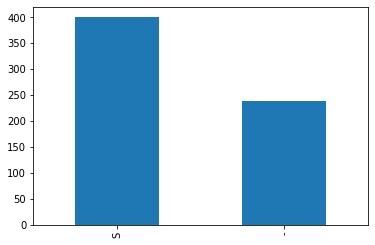

In [ ]:
data['Sharia'].value_counts().plot(kind = 'bar')
plt.show()

Pemilihan Variabel

In [ ]:
data=data.drop(['No.', 'Sector', 'Sub Sector Code', 'Sub Sector','Stock Name','Total Days'],axis=1)

In [ ]:
data

,Code,Sharia,"Market Cap., b.IDR","Regular Volume, th.shares","Regular Value, m.IDR","Regular Freq, x",Regular Days,"Total Volume, th.shares","Total Value, m.IDR","Total Freq, x"
0,BISI,S,4425.000000,14320.6,21188.8290,3847,15,26570.108,39234.826980,3860
1,ANDI,-,3758.700000,1975.7,3773.9010,780,15,2711.000,4773.909000,781
2,AALI,S,20016.758663,8593.9,88918.2750,9706,15,9460.842,97873.369325,9721
3,ANJT,S,3052.299250,778.4,701.6310,134,12,778.400,701.631000,134
4,UNSP,-,222.514449,27257.1,2389.4448,3506,15,27257.400,2389.471200,3508
...,...,...,...,...,...,...,...,...,...,...
633,SIMA,-,41.160858,513369.6,51933.2526,35317,15,513701.713,51967.713250,35320
634,ITMA,S,523.600000,88.4,67.9835,107,14,88.400,67.983500,107
635,SFAN,-,637.500000,33290.1,20139.1928,5338,8,33290.100,20139.192800,5338
636,INDX,-,30.653951,2245.3,157.3933,837,15,2245.300,157.393300,837


Pembentukan Dummy Variabel

In [ ]:
dms = pd.get_dummies(data[['Sharia']])
data= pd.concat([data,dms], axis=1 )
data = data.drop(['Sharia'],axis=1)

In [ ]:
data

,Code,"Market Cap., b.IDR","Regular Volume, th.shares","Regular Value, m.IDR","Regular Freq, x",Regular Days,"Total Volume, th.shares","Total Value, m.IDR","Total Freq, x",Sharia_-,Sharia_S
0,BISI,4425.000000,14320.6,21188.8290,3847,15,26570.108,39234.826980,3860,0,1
1,ANDI,3758.700000,1975.7,3773.9010,780,15,2711.000,4773.909000,781,1,0
2,AALI,20016.758663,8593.9,88918.2750,9706,15,9460.842,97873.369325,9721,0,1
3,ANJT,3052.299250,778.4,701.6310,134,12,778.400,701.631000,134,0,1
4,UNSP,222.514449,27257.1,2389.4448,3506,15,27257.400,2389.471200,3508,1,0
...,...,...,...,...,...,...,...,...,...,...,...
633,SIMA,41.160858,513369.6,51933.2526,35317,15,513701.713,51967.713250,35320,1,0
634,ITMA,523.600000,88.4,67.9835,107,14,88.400,67.983500,107,0,1
635,SFAN,637.500000,33290.1,20139.1928,5338,8,33290.100,20139.192800,5338,1,0
636,INDX,30.653951,2245.3,157.3933,837,15,2245.300,157.393300,837,1,0


In [ ]:
data.columns

Index(['Code', 'Market Cap., b.IDR', 'Regular Volume, th.shares',
       'Regular Value, m.IDR', 'Regular Freq, x', 'Regular Days',
       'Total Volume, th.shares', 'Total Value, m.IDR', 'Total Freq, x',
       'Sharia_-', 'Sharia_S'],
      dtype='object')

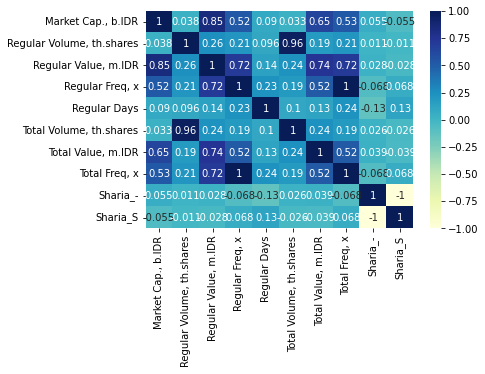

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

Spilting Data

In [ ]:
X = data.drop(['Total Volume, th.shares'], axis = 1)
y = data['Total Volume, th.shares']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Normalisasi

In [ ]:
num=['Market Cap., b.IDR','Regular Volume, th.shares','Regular Value, m.IDR',
     'Regular Freq, x','Regular Days', 'Total Value, m.IDR', 'Total Freq, x']

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train[num])
X_test = scaler.transform(X_test[num])

#Linear Regression

In [ ]:
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np


In [ ]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = X_train[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
# features to consider removing
considered_features = ['Market Cap., b.IDR','Regular Volume, th.shares','Regular Value, m.IDR',
                       'Regular Freq, x','Regular Days', 'Total Value, m.IDR', 'Total Freq, x']


# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Variable,VIF
6,"Total Freq, x",33904.823333
3,"Regular Freq, x",33846.432372
2,"Regular Value, m.IDR",6.566526
0,"Market Cap., b.IDR",3.456096
5,"Total Value, m.IDR",1.760831
1,"Regular Volume, th.shares",1.270321
4,Regular Days,1.072573


#Modelling

In [ ]:
from scipy.stats import kstest
#perform Kolmogorov-Smirnov test
kstest(y_train, 'norm')

KstestResult(statistic=0.9416559395304218, pvalue=0.0)

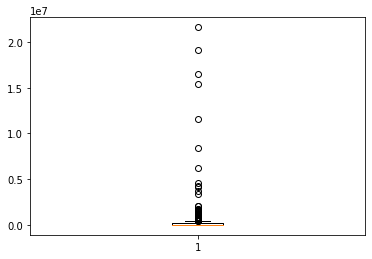

In [ ]:
import matplotlib.pyplot as plt

# Creating plot
plt.boxplot(y_train)

# show plot
plt.show()

In [ ]:
ridge_model= Ridge().fit(X_train, y_train)

In [ ]:
y_pred= ridge_model.predict(X_test)

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Testing performance')
print('MAPE: {:.4f}'.format(mape))
print('MAE: {:.4f}'.format(mae))
print('RMSE: {:.4f}'.format(rmse))
print('R2: {:.4f}'.format(r2))

Testing performance
MAPE: 3810625925145859584.0000
MAE: 162540.0364
RMSE: 252243.7173
R2: 0.8231
